In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Paths
leiden = os.path.join(os.getcwd(), 'input/CRC-097_clean_cylinter_clustering_3d_leiden.parquet')
hdbscan = os.path.join(os.getcwd(), 'input/CRC-097_clean_cylinter_clustering_3d_hdbscan.parquet')
main = os.path.join(os.getcwd(), 'input/main.csv')

out = os.path.join(os.getcwd(), 'output/3d_umap_clusters')
if not os.path.exists(out):
    os.makedirs(out)

HDBSCAN cluster 0


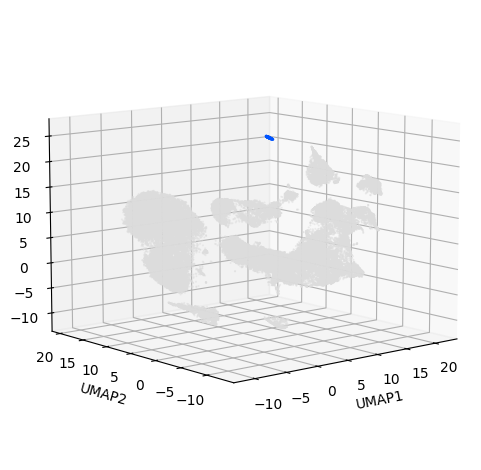

HDBSCAN cluster 1


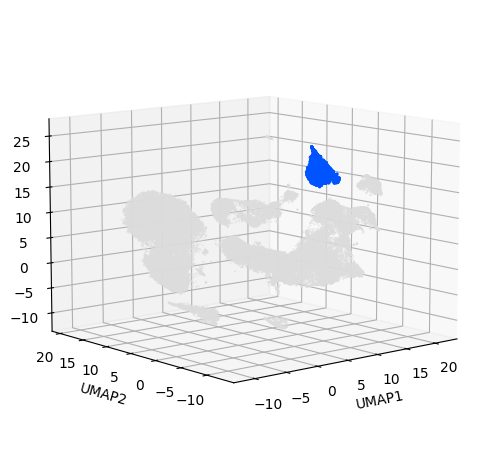

HDBSCAN cluster 2


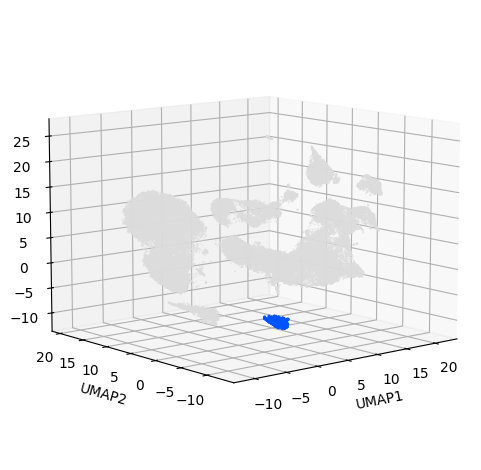

HDBSCAN cluster 3


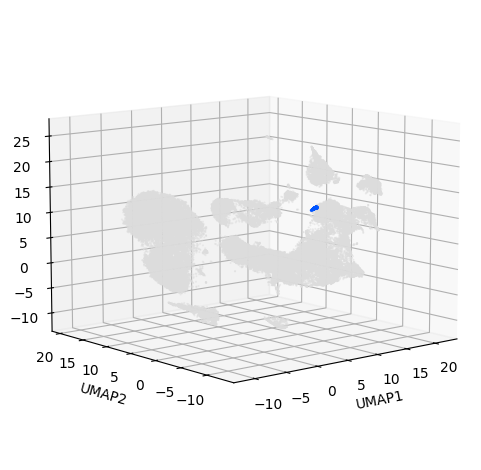

HDBSCAN cluster 4


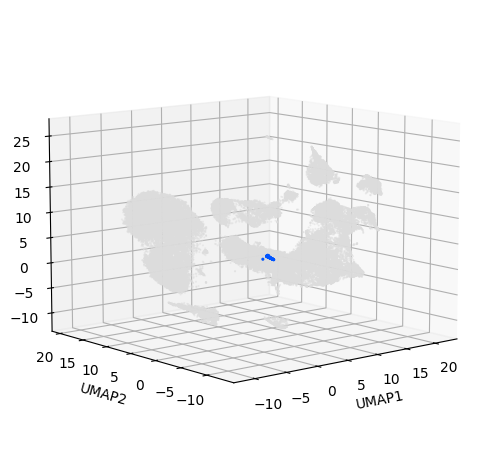

HDBSCAN cluster 5


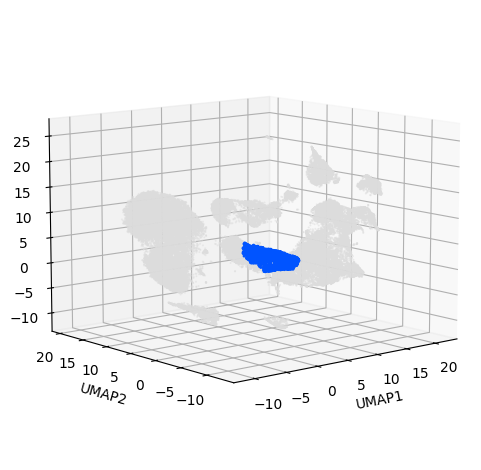

HDBSCAN cluster 6


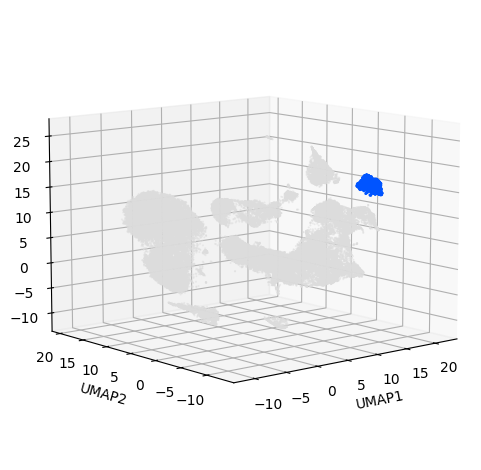

HDBSCAN cluster 7


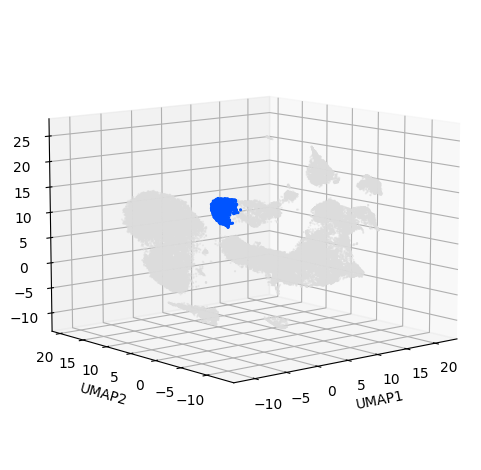

HDBSCAN cluster 8


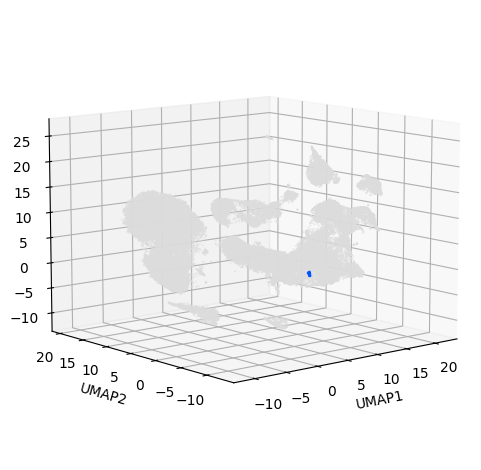

HDBSCAN cluster 9


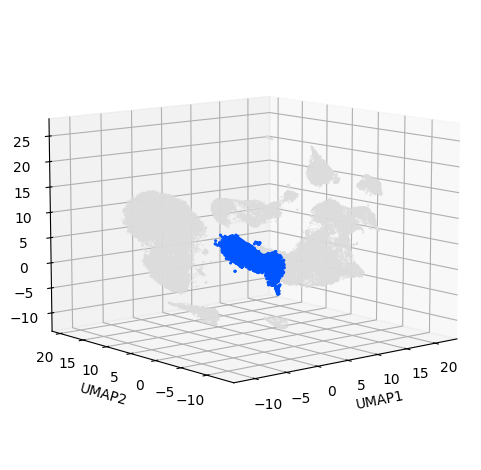

HDBSCAN cluster 10


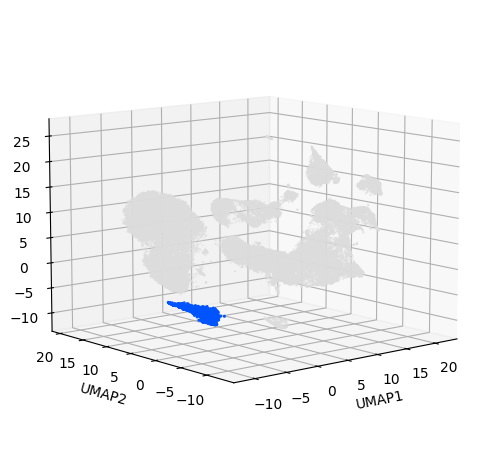

HDBSCAN cluster 11


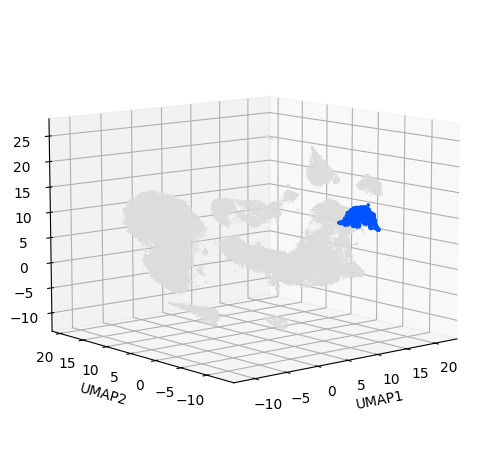

HDBSCAN cluster 12


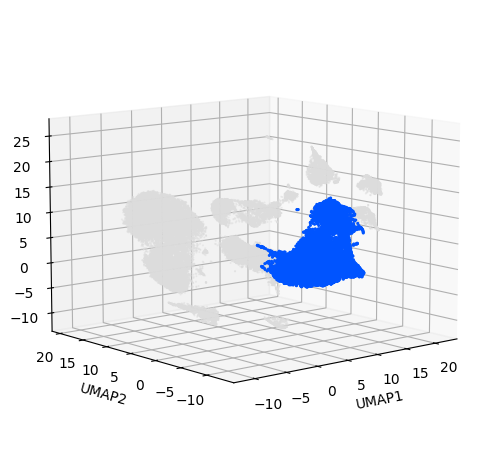

HDBSCAN cluster 13


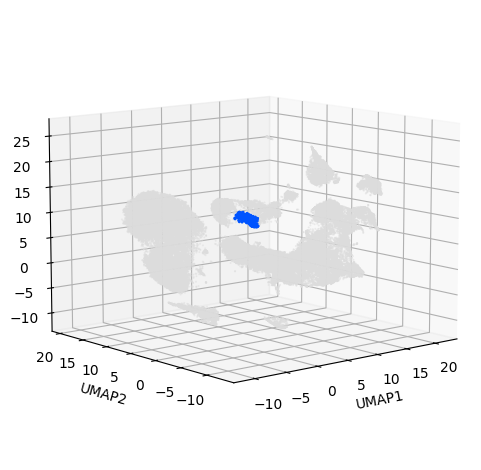

HDBSCAN cluster 14


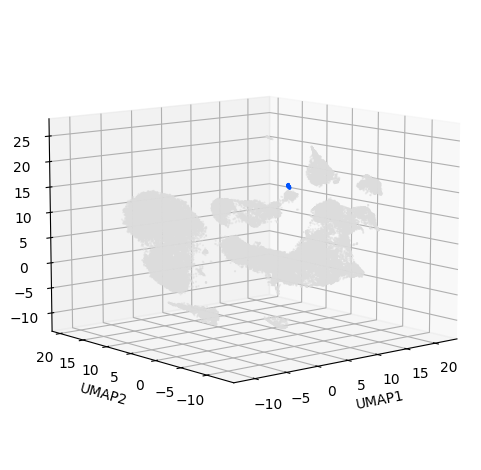

HDBSCAN cluster 15


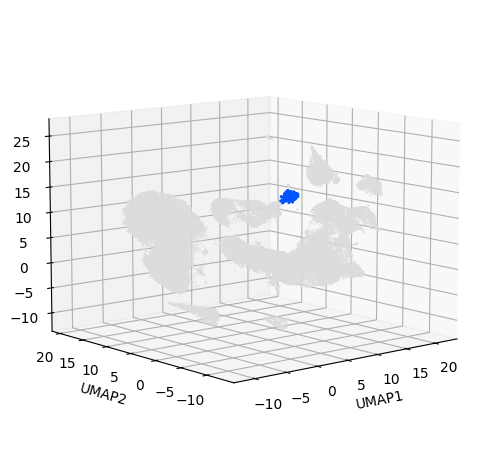

HDBSCAN cluster 16


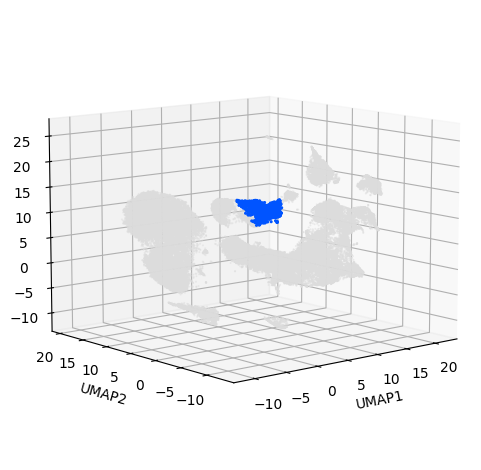

HDBSCAN cluster 17


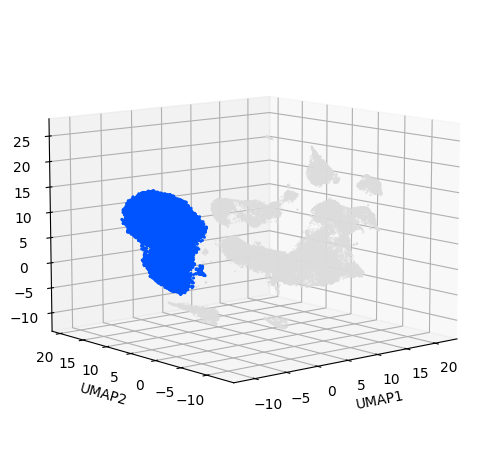

HDBSCAN cluster 18


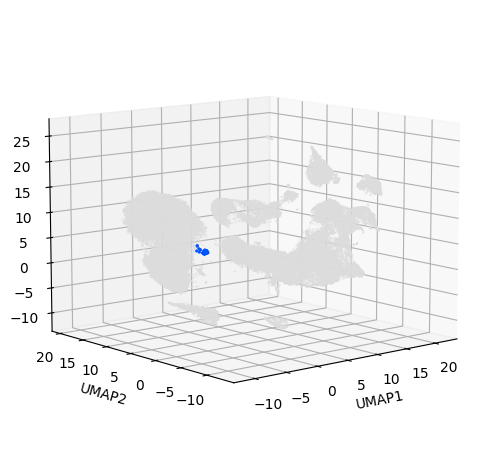

VAE9 cluster 0


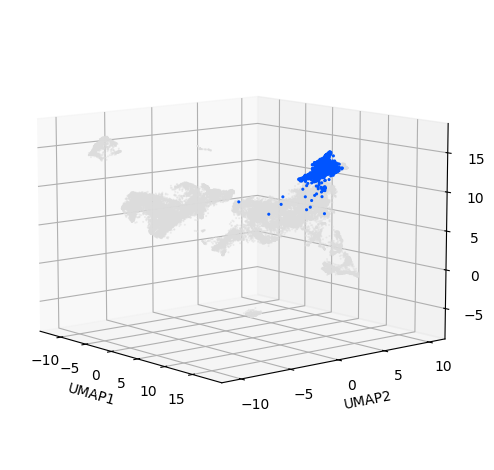

VAE9 cluster 1


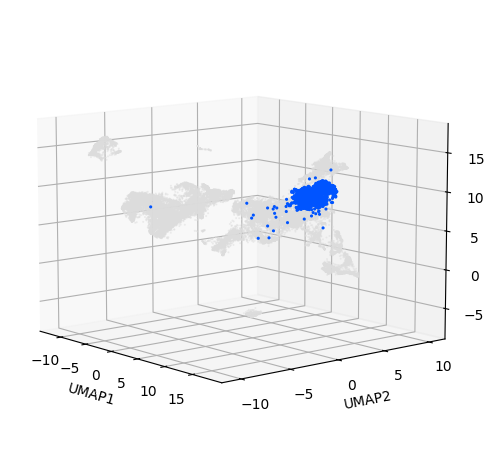

VAE9 cluster 2


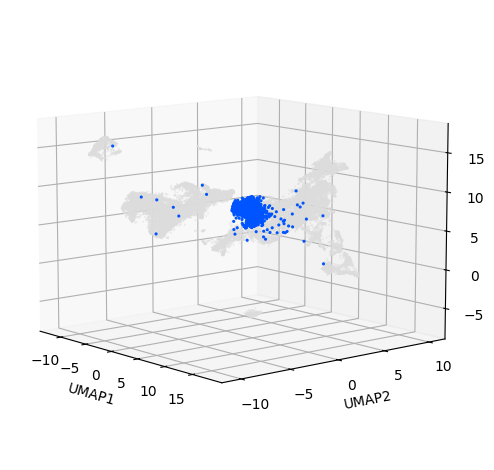

VAE9 cluster 3


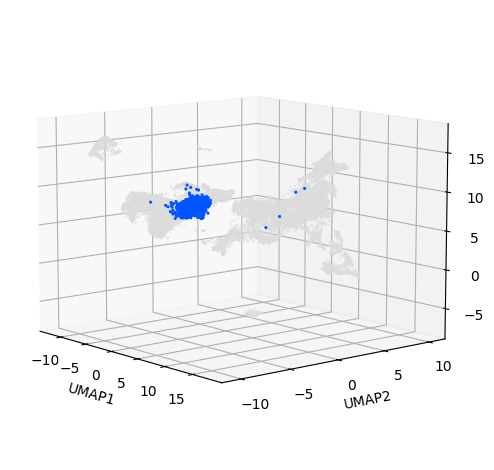

VAE9 cluster 4


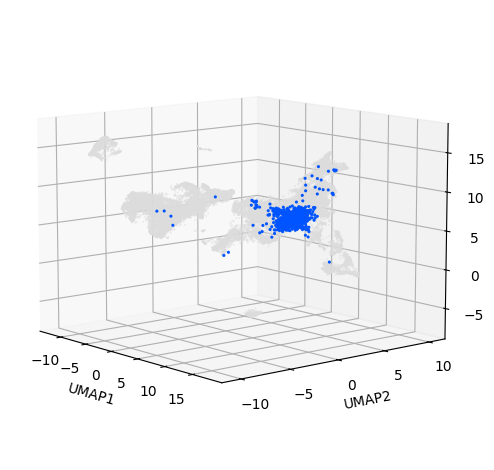

VAE9 cluster 5


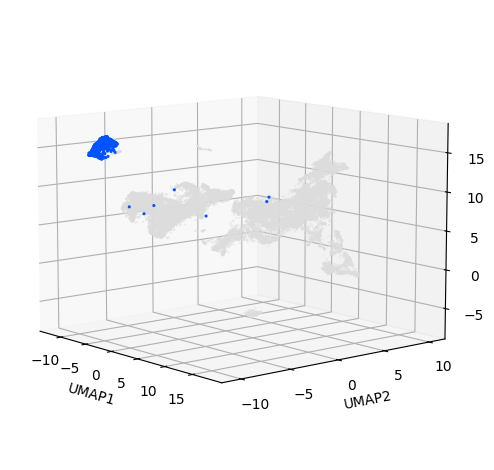

VAE9 cluster 6


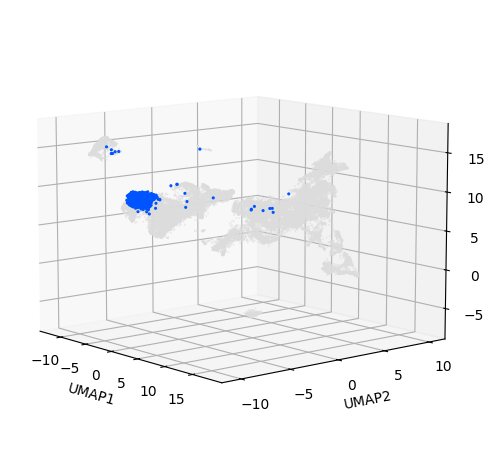

VAE9 cluster 7


KeyboardInterrupt: 

In [3]:
# Plot
for name, col, clustering in zip(
    ['HDBSCAN', 'VAE9', 'VAE20', 'Leiden'],
    ['cluster', 'VAE9_ROT_VIG18', 'VAE20_Leiden', 'cluster_2d'],
    [hdbscan, main, main, leiden]): 
    
    if 'VAE' in name:
        data = pd.read_csv(clustering).sample(frac=0.05)
    else:
        data = pd.read_parquet(clustering).sample(frac=0.05)

    for i in sorted(data[col].unique()):
        if i != -1:
            print(f'{name} cluster {i}')
            
            fig = plt.figure()
            ax = plt.axes(projection='3d', computed_zorder=False)
            if name == 'VAE9':
                ax.view_init(azim=320, elev=10)
            elif name == 'VAE20':
                ax.view_init(azim=360, elev=10)
            else:
                ax.view_init(azim=-130, elev=10)
            
            if name == 'VAE9':
                ax.scatter(
                    data['VAE9_ROT_VIG18_emb_3d_1'],
                    data['VAE9_ROT_VIG18_emb_3d_2'],
                    data['VAE9_ROT_VIG18_emb_3d_3'],
                    c='gainsboro', linewidth=0.0, s=2, alpha=0.5
                )
                ax.scatter(
                    data['VAE9_ROT_VIG18_emb_3d_1'][data[col] == i],
                    data['VAE9_ROT_VIG18_emb_3d_2'][data[col] == i],
                    data['VAE9_ROT_VIG18_emb_3d_3'][data[col] == i],
                    color=(0, 0.33, 1), linewidth=0.0, s=5, alpha=1,
                )
                ax.set_xlabel('UMAP1')
                ax.set_ylabel('UMAP2')
                ax.set_zlabel('UMAP3')
            elif name == 'VAE20':
                ax.scatter(
                    data['VAE20_emb_3d_1'],
                    data['VAE20_emb_3d_2'],
                    data['VAE20_emb_3d_3'],
                    c='gainsboro', linewidth=0.0, s=2, alpha=0.5
                )
                ax.scatter(
                    data['VAE20_emb_3d_1'][data[col] == i],
                    data['VAE20_emb_3d_2'][data[col] == i],
                    data['VAE20_emb_3d_3'][data[col] == i],
                    color=(0, 0.33, 1), linewidth=0.0, s=5, alpha=1,
                )
                ax.set_xlabel('UMAP1')
                ax.set_ylabel('UMAP2')
                ax.set_zlabel('UMAP3')
            else:
                ax.scatter(
                    data['emb1'], data['emb2'], data['emb3'],
                    c='gainsboro', linewidth=0.0, s=2, alpha=0.5
                )
                ax.scatter(
                    data['emb1'][data[col] == i],
                    data['emb2'][data[col] == i],
                    data['emb3'][data[col] == i],
                    color=(0, 0.33, 1), linewidth=0.0, s=5, alpha=1,
                )
                ax.set_xlabel('UMAP1')
                ax.set_ylabel('UMAP2')
                ax.set_zlabel('UMAP3')

            ax.axis('auto')
            ax.tick_params(labelsize=10)
            ax.grid(True)
            plt.tight_layout()
            plt.savefig(os.path.join(out, f'{name}_cluster_{i}.png'), dpi=800)
            plt.show()